#### EDA - Project:

In [2]:
# importing the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import matplotlib.pyplot as plt
%matplotlib inline
import collections
import re, string
import sys
import time
from nltk.corpus import stopwords
from wordcloud import WordCloud
from subprocess import check_output


#### Importing the datasets:

In [50]:
## importing the data
yelp_tips = pd.read_csv("yelp_tip.csv",index_col=0)
yelp_review=pd.read_csv("reviews_reduced.csv",index_col=0)
yelp_business= pd.read_csv("yelp_business.csv",index_col=0)
yelp_users = pd.read_csv("yelp_user.csv",index_col=0)
yelp_review["date"]=  pd.to_datetime(yelp_review["date"], format='%Y-%m-%d')
yelp_review['year'] = yelp_review.date.dt.year

D:\Anaconda\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [51]:
yelp_tips.head()

,business_id,compliment_count,date,text,user_id
0,VaKXUpmWTTWDKbpJ3aQdMw,0,2014-03-27 03:51:24,"Great for watching games, ufc, and whatever el...",UPw5DWs_b-e2JRBS-t37Ag
1,OPiPeoJiv92rENwbq76orA,0,2013-05-25 06:00:56,Happy Hour 2-4 daily with 1/2 price drinks and...,Ocha4kZBHb4JK0lOWvE0sg
2,5KheTjYPu1HcQzQFtm4_vw,0,2011-12-26 01:46:17,Good chips and salsa. Loud at times. Good serv...,jRyO2V1pA4CdVVqCIOPc1Q
3,TkoyGi8J7YFjA6SbaRzrxg,0,2014-03-23 21:32:49,The setting and decoration here is amazing. Co...,FuTJWFYm4UKqewaosss1KA
4,AkL6Ous6A1atZejfZXn1Bg,0,2012-10-06 00:19:27,Molly is definately taking a picture with Sant...,LUlKtaM3nXd-E4N4uOk_fQ


In [52]:
yelp_business.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,NaN,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",NaN,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


In [53]:
yelp_review.head()

,Unnamed: 0.1,business_id,cool,date,funny,review_id,stars,text,useful,user_id,year
0,0,ujmEBvifdJM6h6RLv4wQIg,0,2013-05-07 04:34:36,1.0,Q1sbwvVQXV2734tPgoKj4Q,1.0,Total bill for this horrible service? Over $8G...,6.0,hG7b0MtEbXx5QzbzE6C_VA,2013.0
4,4,b1b1eb3uo-w561D0ZfCEiQ,0,2018-01-30 23:07:38,0.0,11a8sVPMUFtaC7_ABRkmtw,1.0,Today was my second out of three sessions I ha...,7.0,ssoyf2_x0EQMed6fgHeMyQ,2018.0
6,6,3fw2X5bZYeW9xCz_zGhOHg,5,2016-05-07 01:21:02,4.0,G7XHMxG0bx9oBJNECG4IFg,3.0,Tracy dessert had a big name in Hong Kong and ...,5.0,jlu4CztcSxrKx56ba1a5AQ,2016.0
21,21,Mem13A3C202RzT53npn4NA,9,2017-05-13 10:41:43,6.0,IPw8yWiyqnfBzzWmypUHgg,5.0,If you are looking for the best pierogies in P...,9.0,5JVY32_bmTBfIGpCCsnAfw,2017.0
25,25,FQ1wBQb3aNeRMThSQEV0Qg,0,2013-12-07 02:32:45,0.0,I9HBDyzCqLhTYHCAZIFZQQ,5.0,PlumbSmart provided superior service from begi...,4.0,vXZeHaLvdfCPATz5BDavow,2013.0


In [54]:
yelp_review=yelp_review.drop("Unnamed: 0.1",axis=1)
yelp_review.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,year
0,ujmEBvifdJM6h6RLv4wQIg,0,2013-05-07 04:34:36,1.0,Q1sbwvVQXV2734tPgoKj4Q,1.0,Total bill for this horrible service? Over $8G...,6.0,hG7b0MtEbXx5QzbzE6C_VA,2013.0
4,b1b1eb3uo-w561D0ZfCEiQ,0,2018-01-30 23:07:38,0.0,11a8sVPMUFtaC7_ABRkmtw,1.0,Today was my second out of three sessions I ha...,7.0,ssoyf2_x0EQMed6fgHeMyQ,2018.0
6,3fw2X5bZYeW9xCz_zGhOHg,5,2016-05-07 01:21:02,4.0,G7XHMxG0bx9oBJNECG4IFg,3.0,Tracy dessert had a big name in Hong Kong and ...,5.0,jlu4CztcSxrKx56ba1a5AQ,2016.0
21,Mem13A3C202RzT53npn4NA,9,2017-05-13 10:41:43,6.0,IPw8yWiyqnfBzzWmypUHgg,5.0,If you are looking for the best pierogies in P...,9.0,5JVY32_bmTBfIGpCCsnAfw,2017.0
25,FQ1wBQb3aNeRMThSQEV0Qg,0,2013-12-07 02:32:45,0.0,I9HBDyzCqLhTYHCAZIFZQQ,5.0,PlumbSmart provided superior service from begi...,4.0,vXZeHaLvdfCPATz5BDavow,2013.0


In [57]:
yelp_users.head()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,4.03,1,0,1,2,0,0,1,0,1,...,25,"2015,2016,2017",5,"c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",17,Rashmi,95,84,l6BmjZMeQD3rDxWUbiAiow,2013-10-08 23:11:33
1,3.63,1,0,1,1,0,0,0,0,0,...,16,NaN,4,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",22,Jenna,33,48,4XChL029mKr5hydo79Ljxg,2013-02-21 22:29:06
2,3.71,0,0,0,0,0,0,1,0,0,...,10,NaN,0,"4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...",8,David,16,28,bc8C_eETBWL0olvFSJJd0w,2013-10-04 00:16:10
3,4.85,0,0,0,1,0,0,0,0,2,...,14,NaN,5,"RZ6wS38wnlXyj-OOdTzBxA, l5jxZh1KsgI8rMunm-GN6A...",4,Angela,17,30,dD0gZpBctWGdWo9WlGuhlA,2014-05-22 15:57:30
4,4.08,80,0,80,28,1,1,16,5,57,...,665,"2015,2016,2017,2018",39,"mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6DeQ...",279,Nancy,361,1114,MM4RJAeH6yuaN8oZDSt0RA,2013-10-23 07:02:50


In [58]:
yelp_review.cool.dtypes

dtype('O')

#### Overview of reviews Dataset :

In [59]:
useful_reviews = len(yelp_review[yelp_review["useful"]>0])
#cool_reviews = len(yelp_review[yelp_review["cool"]>0])#
funny_reviews = len(yelp_review[yelp_review["funny"]>0])
negative_reviws = len(yelp_review[yelp_review["stars"]<2])
positive_reviews =len(yelp_review[yelp_review["stars"]>3])
total_reviews = len(yelp_review)

print("Total reviews: {}".format(total_reviews))
print("Useful reviews: {}".format(useful_reviews))
print("Funny reviews: {}".format(funny_reviews))
#print("Cool reviews: {}".format(cool_reviews))
print("Total negative reviews: {}".format(negative_reviws))
print("Total positive reviews: {}".format(positive_reviews))

Total reviews: 665971
Useful reviews: 665966
Funny reviews: 438004
Total negative reviews: 168968
Total positive reviews: 356569


#### Top reviewed business:

In [4]:
top_reviewed = reviews[reviews["stars"]>=4]
top_reviews_dict ={}

for business_id in top_reviewed["business_id"].values:
    try :
        top_reviews_dict[business_id] =top_reviews_dict[business_id]+1
    except:
        top_reviews_dict[business_id]=1
        
topbusiness = pd.DataFrame.from_dict(data= top_reviews_dict,orient="index")

topbusiness.reset_index(inplace=True)
topbusiness.columns = ['business_id', 'rated']
del(top_reviews_dict)
del(top_reviewed)

NameError: name 'reviews' is not defined

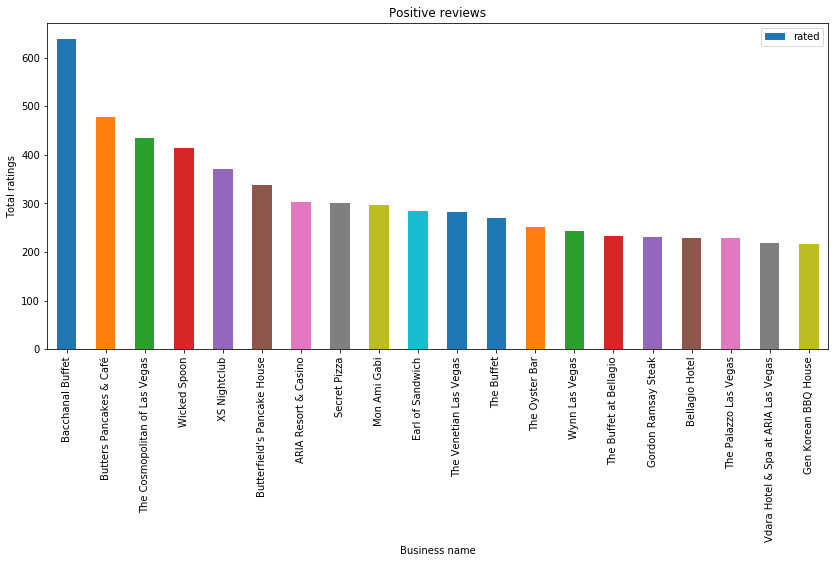

In [61]:
top_count= 20
right=pd.DataFrame(yelp_business[['business_id',"name","categories"]].values,
                    columns=['business_id',"Business name","categories"])

top_business_data = pd.merge(topbusiness,right=right, how="inner",on='business_id')
top_business_data.sort_values("rated")[::-1][:top_count].plot(x="Business name",y="rated", 
                                                   kind="bar",figsize=(14,6),
                                                   title='Positive reviews').set_ylabel("Total ratings")

del(topbusiness)
del(right)

#### Businesses reviewed over time

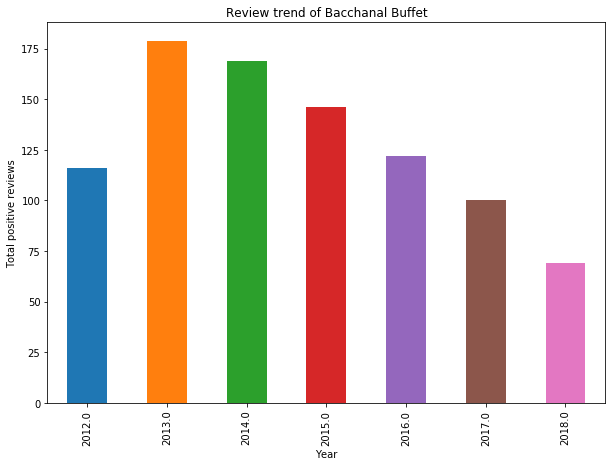

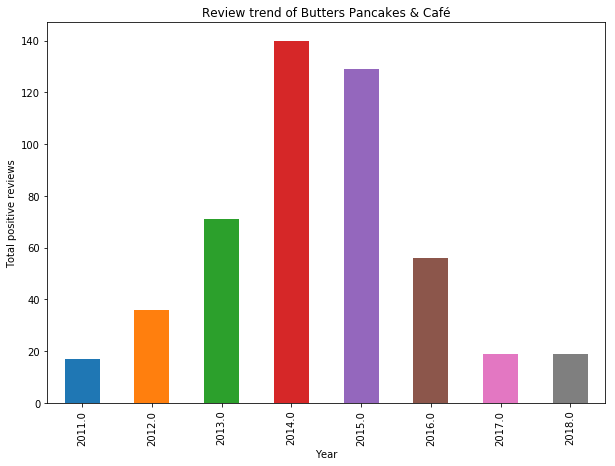

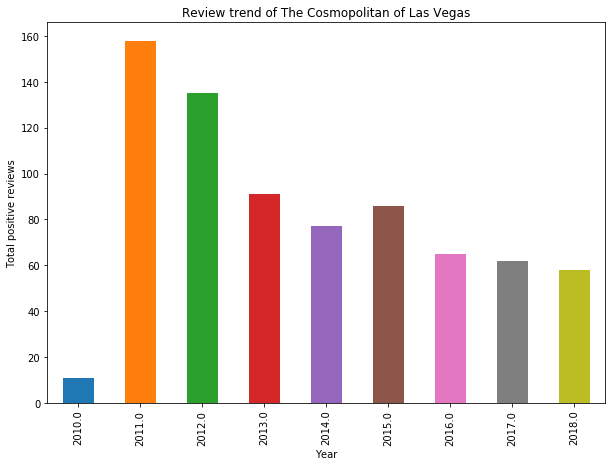

In [63]:
num_business = 3
business_ids = top_business_data.sort_values("rated")[::-1][:num_business].business_id.values
business_names = top_business_data.sort_values("rated")[::-1][:num_business]["Business name"].values
for i, business_id in enumerate(business_ids):
    useful_b = yelp_review.loc[yelp_review['business_id'] == business_id]
    useful_b = useful_b.groupby(['year']).size().reset_index(name='counts')
    #print(useful_b.head())
    series = pd.Series(useful_b["counts"].values, index=useful_b["year"].values, name='Review trend')
    axes = series.plot(kind="bar",figsize=(10, 7))
    plt.xlabel('Year', axes=axes)
    plt.ylabel('Total positive reviews', axes=axes)
    plt.title('Review trend of {}'.format(business_names[i]), axes=axes)
    plt.show()

### Categories of top reviewed businesses

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline
num_cat =10 # to show top 10 catrgories
top_business = 30 # choose categories of top 30 businesses
cat_data = top_business_data.sort_values("rated")[::-1][:top_business]
#cat_data.categories
Categories={}
for cat in cat_data.categories.values:
    all_categories= cat.split(",")
    for x in all_categories:
        try :
            Categories[x] =Categories[x]+1
        except:
            Categories[x]=1
top_categories = pd.DataFrame.from_dict(data= Categories,orient="index")
top_categories.reset_index(inplace=True)
top_categories.columns = ['category', 'occurance']

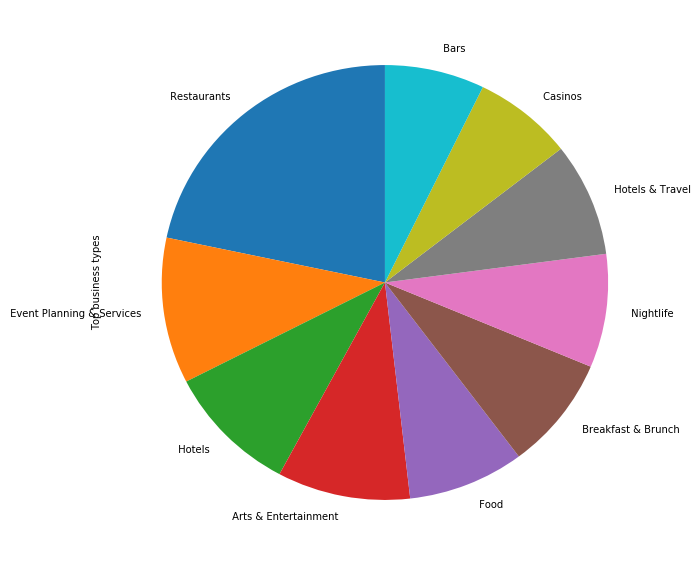

In [77]:
x_val=top_categories.sort_values("occurance")[::-1][:num_cat].occurance.values
labels=top_categories.sort_values("occurance")[::-1][:num_cat].category.values
series = pd.Series(x_val, index=labels, name='Top business types')
series.plot.pie(figsize=(10, 10),startangle=90)

### Categories of trending businesses

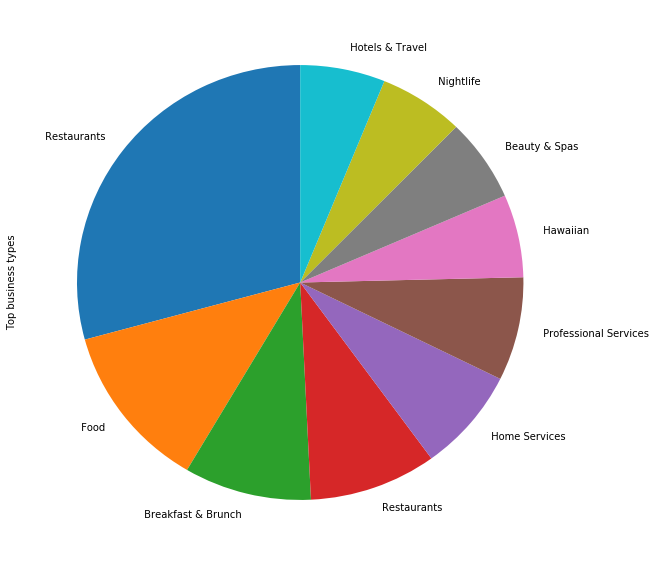

In [79]:
num_cat =10 # to show top 10 catrgories
top_business = 40 # choose categories of top 30 businesses
business_ids = trending_business_reviews.sort_values(['year','counts'])[::-1][:top_business].business_id.values
cat_data = top_business_data.loc[top_business_data['business_id'].isin(business_ids)]
#cat_data.categories
Categories={}
for cat in cat_data.categories.values:
    all_categories= cat.split(",")
    for x in all_categories:
        try :
            Categories[x] =Categories[x]+1
        except:
            Categories[x]=1
top_categories = pd.DataFrame.from_dict(data= Categories,orient="index")
top_categories.reset_index(inplace=True)
top_categories.columns = ['category', 'occurance']

x_val=top_categories.sort_values("occurance")[::-1][:num_cat].occurance.values
labels=top_categories.sort_values("occurance")[::-1][:num_cat].category.values
series = pd.Series(x_val, index=labels, name='Top business types')
series.plot.pie(figsize=(10, 10),startangle=90)

### Negatively reviewed businesses:

In [80]:
bottom_reviewed = yelp_review[yelp_review["stars"]<2]
bottom_reviews_dict ={} 

for business_id in bottom_reviewed["business_id"].values:
    try :
        bottom_reviews_dict[business_id] =bottom_reviews_dict[business_id]+1
    except:
        bottom_reviews_dict[business_id]=1
        
bottombusiness = pd.DataFrame.from_dict(data= bottom_reviews_dict,orient="index")

bottombusiness.reset_index(inplace=True)
#bottombusiness.head()
bottombusiness.columns = ['business_id', 'rated']

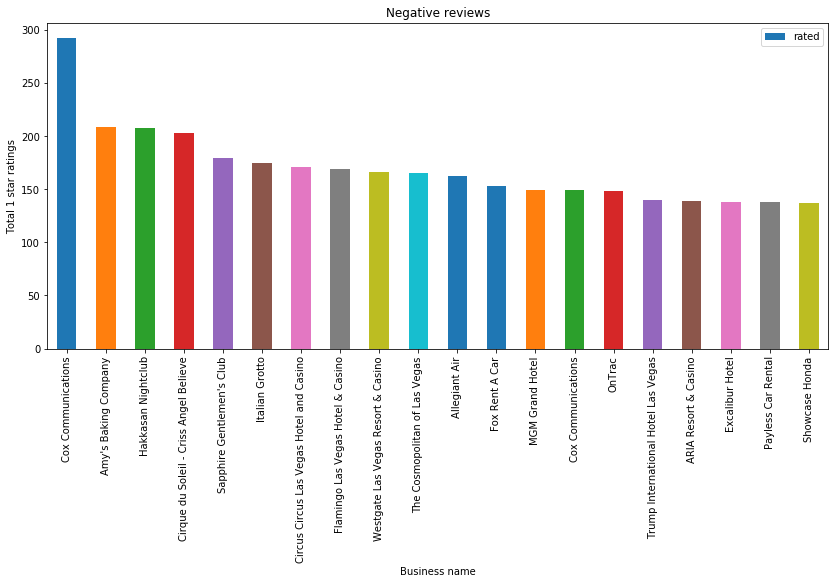

In [81]:
top_count= 20
right=pd.DataFrame(yelp_business[['business_id',"name","categories"]].values,
                    columns=['business_id',"Business name","categories"])

bottom_business_data = pd.merge(bottombusiness,right=right, how="inner",on='business_id')
bottom_business_data.sort_values("rated")[::-1][:top_count].plot(x="Business name",y="rated", 
                                                   kind="bar",figsize=(14,6),
                                                   title='Negative reviews').set_ylabel("Total 1 star ratings")

del(bottom_reviewed)
del(bottom_reviews_dict)
del(bottombusiness)
del(right)

### Business categories which needs improvement:

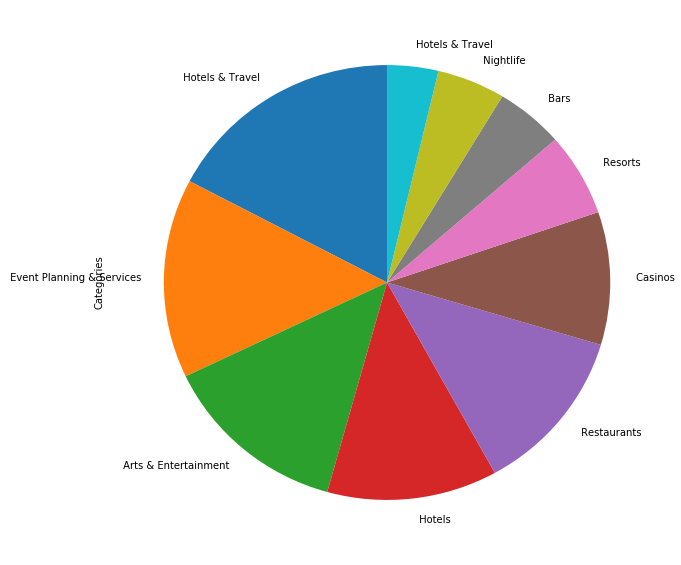

In [84]:
num_cat =10 # to show top 10 catrgories
bottom_business = 30 # choose categories of top 30 businesses
cat_data = bottom_business_data.sort_values("rated")[::-1][:bottom_business]

Categories={}
for cat in cat_data.categories.values:
    all_categories= cat.split(",")
    for x in all_categories:
        try :
            Categories[x] =Categories[x]+1
        except:
            Categories[x]=1
bottom_categories = pd.DataFrame.from_dict(data= Categories,orient="index")
bottom_categories.reset_index(inplace=True)
bottom_categories.columns = ['category', 'occurance']

x_val=bottom_categories.sort_values("occurance")[::-1][:num_cat].occurance.values
labels=bottom_categories.sort_values("occurance")[::-1][:num_cat].category.values
series = pd.Series(x_val, index=labels, name='Categories')
series.plot.pie(figsize=(10, 10),startangle=90)

### Lets find most frequent words in Negative reviews:

In [2]:
def tokenize(s):
    """Convert string to lowercase and split into words (ignoring
    punctuation), returning list of words.
    """
    word_list = re.findall(r'\w+', s.lower())
    filtered_words = [word for word in word_list if word not in stopwords.words('english')]
    return filtered_words


def count_ngrams(lines, min_length=2, max_length=4):
    """Iterate through given lines iterator (file object or list of
    lines) and return n-gram frequencies. The return value is a dict
    mapping the length of the n-gram to a collections.Counter
    object of n-gram tuple and number of times that n-gram occurred.
    Returned dict includes n-grams of length min_length to max_length.
    """
    lengths = range(min_length, max_length + 1)
    ngrams = {length: collections.Counter() for length in lengths}
    queue = collections.deque(maxlen=max_length)

    # Helper function to add n-grams at start of current queue to dict
    def add_queue():
        current = tuple(queue)
        for length in lengths:
            if len(current) >= length:
                ngrams[length][current[:length]] += 1

    # Loop through all lines and words and add n-grams to dict
    for line in lines:
        for word in tokenize(line):
            queue.append(word)
            if len(queue) >= max_length:
                add_queue()

    # Make sure we get the n-grams at the tail end of the queue
    while len(queue) > min_length:
        queue.popleft()
        add_queue()

    return ngrams

def print_most_frequent(ngrams, num=10):
    """Print num most common n-grams of each length in n-grams dict."""
    for n in sorted(ngrams):
        print('----- {} most common {}-word phrase -----'.format(num, n))
        for gram, count in ngrams[n].most_common(num):
            print('{0}: {1}'.format(' '.join(gram), count))
        print('')

def print_word_cloud(ngrams, num=5):
    """Print word cloud image plot """
    words = []
    for n in sorted(ngrams):
        for gram, count in ngrams[n].most_common(num):
            s = ' '.join(gram)
            words.append(s)
            
    cloud = WordCloud(width=1440, height= 1080,max_words= 200).generate(' '.join(words))
    plt.figure(figsize=(20, 14))
    plt.imshow(cloud)
    plt.axis('off');
    plt.show()
    print('')

In [3]:
num_business_analysis = 1 # basically this will tell how much computing and diverse our analysis will be
business_ids=bottom_business_data.sort_values("rated")[::-1][:num_business_analysis].business_id.values
business_names = bottom_business_data.sort_values("rated")[::-1][:num_business_analysis]["Business name"].values
# get all the reviews and analyse them
#business_names
for i, business_id in enumerate(business_ids):
    # now extract reviews from reviews data
    print("Analysing business: ",business_names[i])
    reviews = yelp_review.loc[yelp_review['business_id'] == business_id].text.values
    most_used_text = count_ngrams(reviews,max_length=3)
    print_most_frequent(most_used_text, num=10)
    print_word_cloud(most_used_text, 10)
    #print ("total reviews ",len(reviews))
    

NameError: name 'bottom_business_data' is not defined

### Most frequent tips

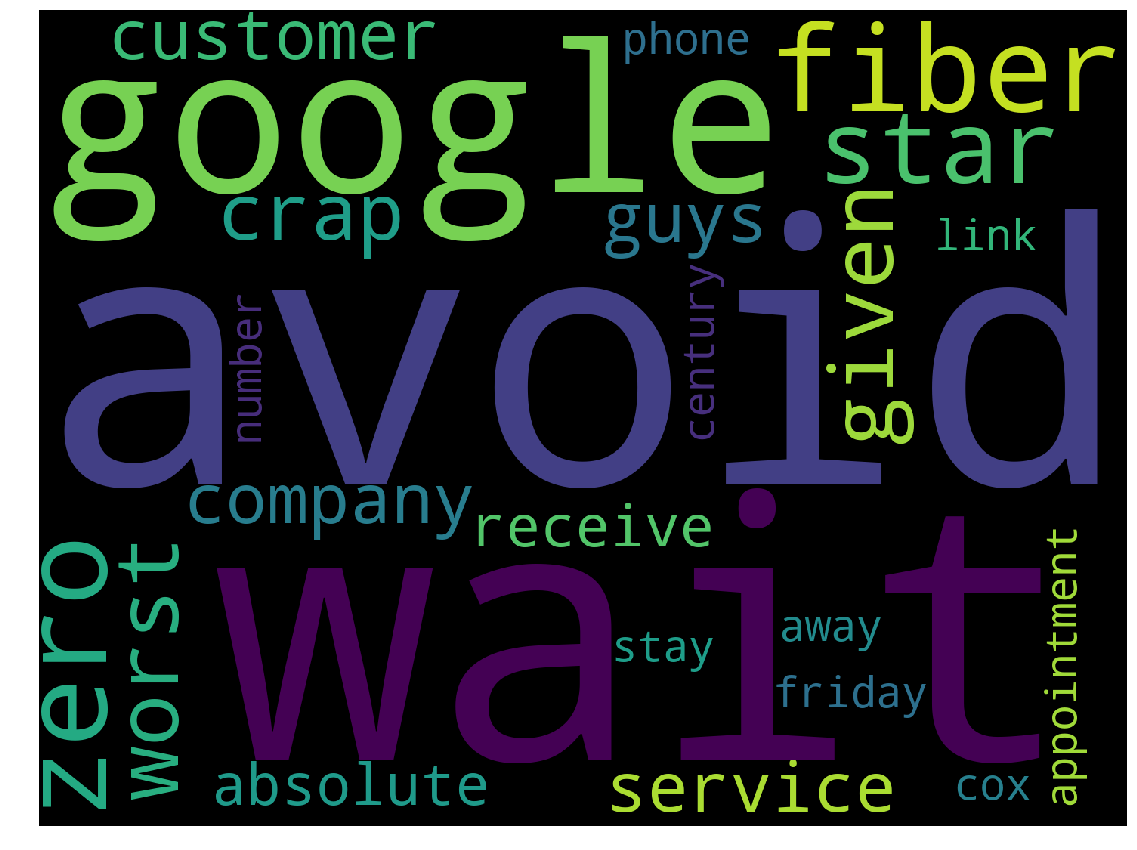

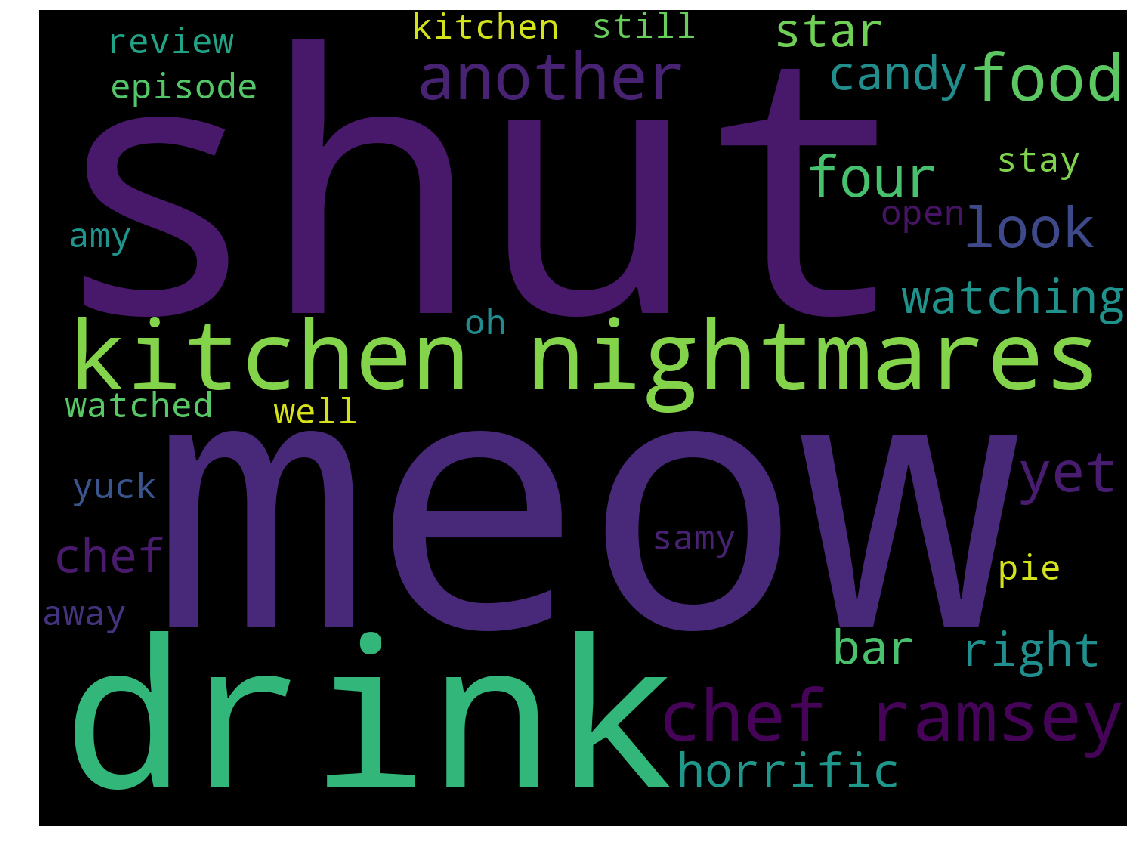

In [90]:
num_business_analysis = 2 # basically this will tell how much computing and diverse our analysis will be
business_ids=bottom_business_data.sort_values("rated")[::-1][:num_business_analysis].business_id.values
business_names = bottom_business_data.sort_values("rated")[::-1][:num_business_analysis]["Business name"].values
# get all the reviews and analyse them
#business_names
for i, business_id in enumerate(business_ids):
    # now extract reviews from reviews data
    #print("Analysing business: ",business_names[i])
    reviews = yelp_tips.loc[yelp_tips['business_id'] == business_id].text.values
    most_used_text = count_ngrams(reviews,max_length=4)
    #print_most_frequent(most_used_text, num=10)
    print_word_cloud(most_used_text, 10)
    #print ("total reviews ",len(reviews))

### Lets find relationship between users's friends and review patterns

In [91]:
top_users = 15
user_most_reviews = yelp_review.groupby(['user_id']).size().reset_index(name='counts')
top_users_ids = user_most_reviews.sort_values(['counts'])[::-1][:top_users].user_id.values

In [92]:
user_frnds = {}
for  users_id in top_users_ids:
    
    record = yelp_users.loc[yelp_users['user_id'] == users_id]
    user_frnds[users_id] = {}
    user_frnds[users_id]["name"]= record.name.values[0]
    user_frnds[users_id]["friends"]= record.friends.values[0]
    if record.friends is not "None":
        user_frnds[users_id]["friends_count"]= len(record.friends.values[0].split(","))
    else:
        user_frnds[users_id]["friends_count"]=0
    user_frnds[users_id]["review_count"]=record.review_count.values[0]
    user_frnds[users_id]["fans"]=record.fans.values[0]

In [93]:
 user_friend_df = pd.DataFrame.from_dict(data= user_frnds,orient="index")

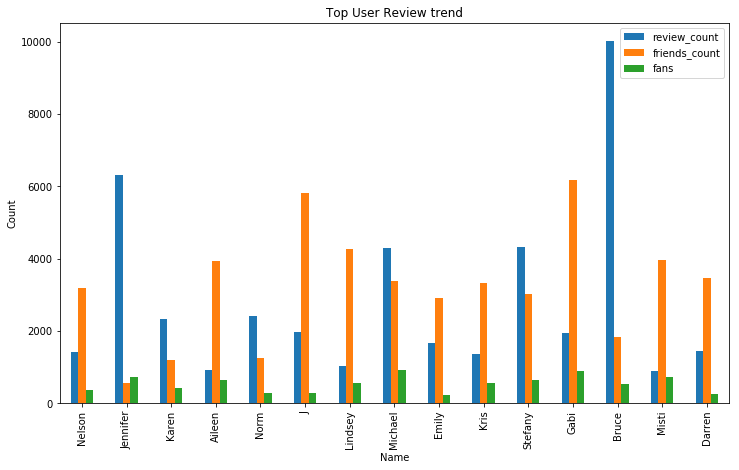

In [94]:
axes = user_friend_df.plot(x="name", y=["review_count", "friends_count", "fans"],
                           kind="bar",figsize=(12, 7))
plt.xlabel('Name', axes=axes)
plt.ylabel('Count', axes=axes)
plt.title('Top User Review trend'.format(business_name), axes=axes)
plt.show()